In [2]:
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
%cd '/content/drive/My Drive/IHA/Output'

/content/drive/My Drive/IHA/Output


In [ ]:
# For Jupyter Notebook
%cd ..\Output

G:\My Drive\IHA\Output


In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sb_number = '3'
sb = 'Sub' + sb_number

ssp45 = pd.read_csv('../fdc_' + sb + '_45.csv')
ssp85 = pd.read_csv('../fdc_' + sb + '_85.csv')

In [1]:
sb_number = '3'
sb = 'Sub' + sb_number

print(sb)

Sub3


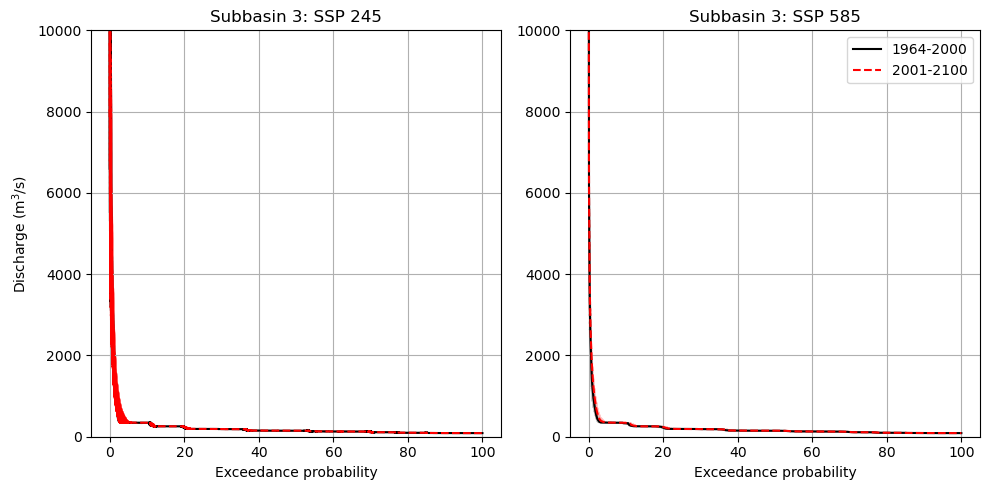

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# SSP 245
sns.lineplot(x='exceedance probability', y='flow value', data=ssp45, color='k', ax=axes[0])
sns.lineplot(x='exceedance probability.13', y='flow value.13', data=ssp45, color='r', linestyle='--', ax=axes[0])
#axes[0].set_yscale('log')
axes[0].set_xlabel('Exceedance probability')
axes[0].set_ylabel('Discharge ($\mathregular{m^{3}}$/s)')
axes[0].set_title('Subbasin ' + sb_number + ': SSP 245')
axes[0].grid(True)
axes[0].set_ylim(0, 10000)

# SSP 585
sns.lineplot(x='exceedance probability', y='flow value', data=ssp85, color='k', ax=axes[1])
sns.lineplot(x='exceedance probability.13', y='flow value.13', data=ssp85, color='r', linestyle='--', ax=axes[1])
#axes[1].set_yscale('log')
axes[1].set_xlabel('Exceedance probability')
axes[1].set_ylabel('')
axes[1].set_title('Subbasin ' + sb_number + ': SSP 585')
axes[1].grid(True)
axes[1].set_ylim(0, 10000)

# For axes[1] (SSP 85)
axes[1].plot([], [], color='k', label='1964-2000')
axes[1].plot([], [], color='r', linestyle='--', label='2001-2100')
axes[1].legend(loc='upper right')

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig('../jpeg/subbasin_' + sb_number + '.png', dpi=300)

In [ ]:
month = ['Jan', 'Feb', 'Mar', 'Apr',
        'May', 'Jun', 'Jul', 'Aug',
        'Sep', 'Oct', 'Nov', 'Dec']

month_code = ['1', '2', '3', '4',
             '5', '6', '7', '8',
             '9', '10', '11', '12']

month_code_01 = ['14', '15', '16', '17',
             '18', '19', '20', '21',
             '22', '23', '24', '25']

Processing for Sub-basin: 3
Processing for: Jan
Processing for: Feb
Processing for: Mar
Processing for: Apr
Processing for: May
Processing for: Jun
Processing for: Jul
Processing for: Aug
Processing for: Sep
Processing for: Oct
Processing for: Nov
Processing for: Dec


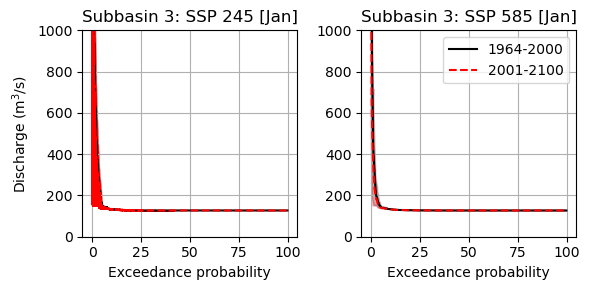

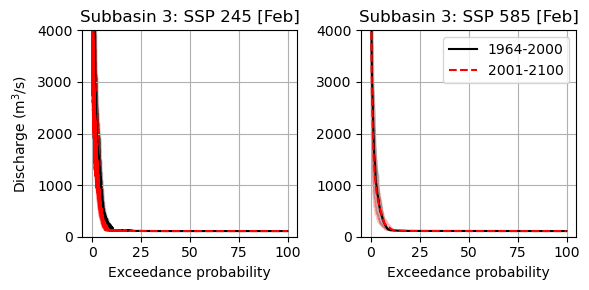

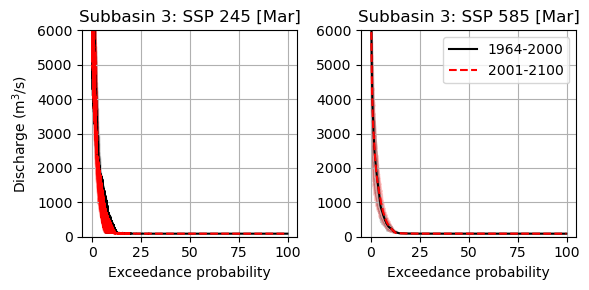

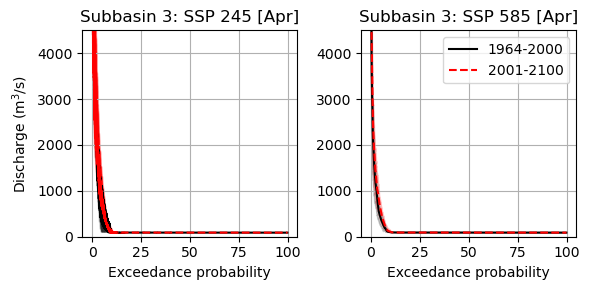

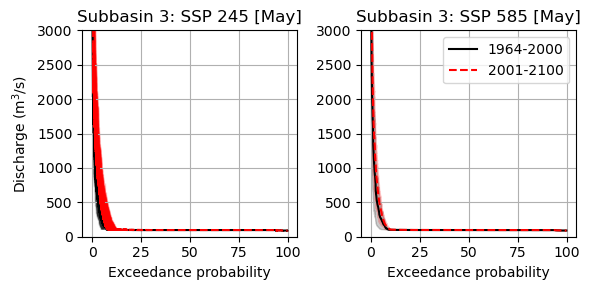

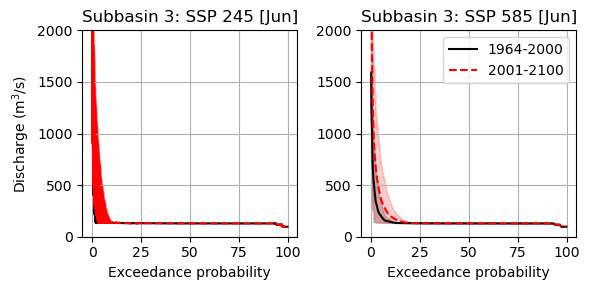

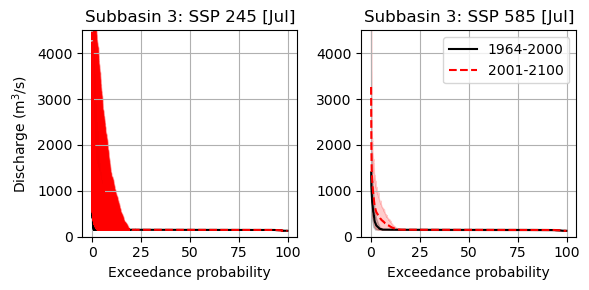

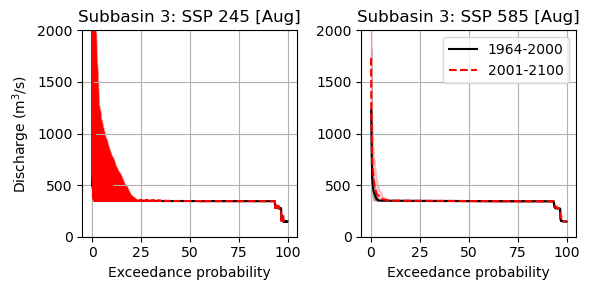

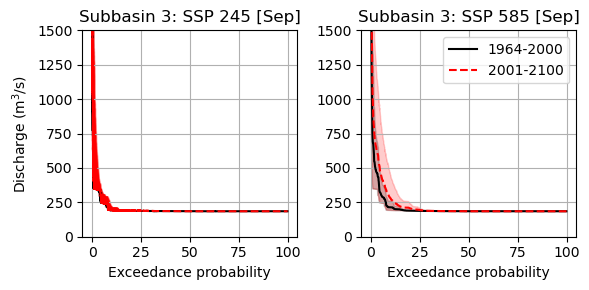

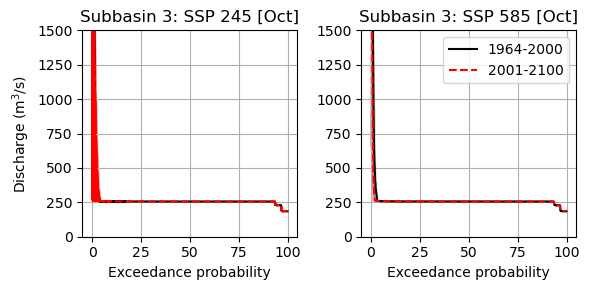

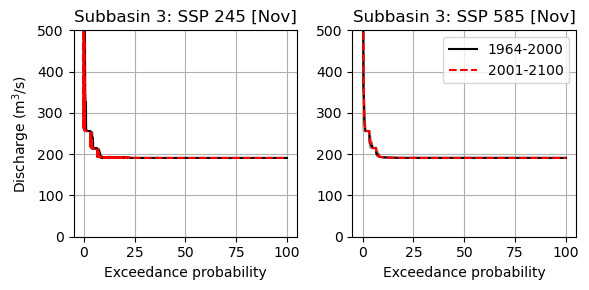

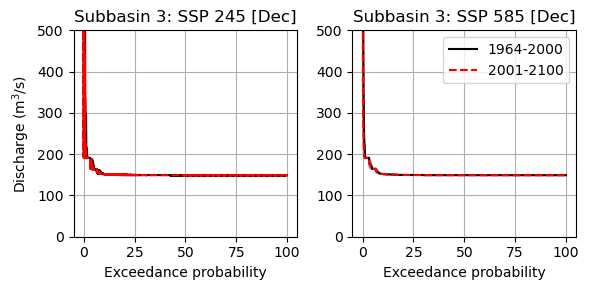

In [ ]:
import math
#sb_numbers = ['1', '2', '3', '5']
sb_numbers = ['3']

for sb_number in sb_numbers:
    print ('Processing for Sub-basin:', sb_number)
    sb = 'Sub' + sb_number

    ssp45 = pd.read_csv('../fdc_' + sb + '_45.csv')
    ssp85 = pd.read_csv('../fdc_' + sb + '_85.csv')


    for n in range (1, len(month)+1):
        print ('Processing for:', month[n-1])
        #n = 2   # Month starting from 1 as Jan, to 12 as Dec

        x_var1 = 'exceedance probability.' + month_code[n-1]
        x_var2 = 'exceedance probability.' + month_code_01[n-1]

        y_var1 = 'flow value.' + month_code[n-1]
        y_var2 = 'flow value.' + month_code_01[n-1]

        max_value = max(ssp45[y_var1].quantile(0.99), ssp85[y_var1].quantile(0.99),
                        ssp45[y_var2].quantile(0.99), ssp85[y_var2].quantile(0.99))
        ylim = math.ceil(max_value/500) * 500

        fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

        # SSP 245
        sns.lineplot(x= x_var1, y= y_var1, data=ssp45, color='k', ax=axes[0])
        sns.lineplot(x= x_var2, y= y_var2, data=ssp45, color='r', linestyle='--', ax=axes[0])
        #axes[0].set_yscale('log')
        axes[0].set_xlabel('Exceedance probability')
        axes[0].set_ylabel('Discharge ($\mathregular{m^{3}}$/s)')
        axes[0].set_title('Subbasin ' + sb_number + ': SSP 245'+ ' [' + month[n-1] +']')
        axes[0].grid(True)
        axes[0].set_ylim(0, ylim)

        # SSP 585
        sns.lineplot(x= x_var1, y= y_var1, data=ssp85, color='k', ax=axes[1])
        sns.lineplot(x= x_var2, y= y_var2, data=ssp85, color='r', linestyle='--', ax=axes[1])
        #axes[1].set_yscale('log')
        axes[1].set_xlabel('Exceedance probability')
        axes[1].set_ylabel('')
        axes[1].set_title('Subbasin ' + sb_number + ': SSP 585'+ ' [' + month[n-1] +']')
        axes[1].grid(True)
        axes[1].set_ylim(0, ylim)

        # For axes[1] (SSP 85)
        axes[1].plot([], [], color='k', label='1964-2000')
        axes[1].plot([], [], color='r', linestyle='--', label='2001-2100')
        axes[1].legend(loc='upper right')

        plt.tight_layout()  # Adjust spacing between subplots
        plt.savefig('../jpeg/subbasin_' + sb_number + '_' + month[n-1] + '.png', dpi=300)

3000

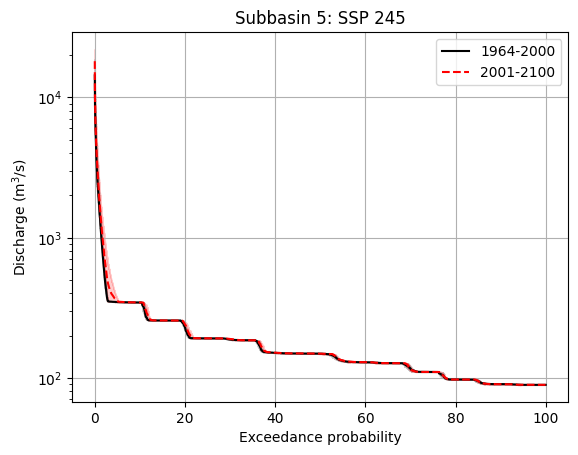

In [ ]:
ax = sns.lineplot(x='exceedance probability',
                  y='flow value', data=ssp45, label = '1964-2000',
                  color = 'k')

sns.lineplot(x='exceedance probability.13',
             y='flow value.13', data=ssp45, label = '2001-2100',
             color = 'r', linestyle = '--')

plt.yscale('log')

plt.xlabel('Exceedance probability')
plt.ylabel('Discharge ($\mathregular{m^{3}}$/s)')
plt.title('Subbasin 5: SSP 245')
plt.grid(True)

plt.show()

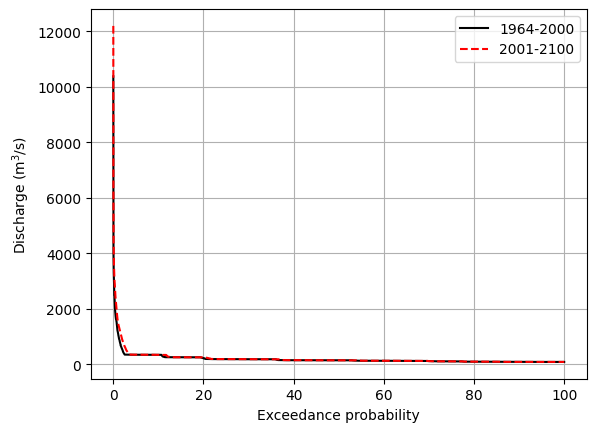

In [ ]:
ax = sns.lineplot(x='exceedance probability',
                  y='flow value', data=df, label = '1964-2000',
                  color = 'k')
sns.lineplot(x='exceedance probability.13',
             y='flow value.13', data=df, label = '2001-2100',
             color = 'r', linestyle = '--')
plt.xlabel('Exceedance probability')
plt.ylabel('Discharge ($\mathregular{m^{3}}$/s)')
plt.grid(True)
plt.show()